In [21]:
# scientific package imports
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

# import my own class for this homework
from galaxies import Galaxies

Get a Galaxies object containing data and methods for our 3 galaxies:

In [5]:
g = Galaxies()
g.filenames

['MW_000', 'M31_000', 'M33_000']

How many particles of each type?

In [16]:
counts = g.get_counts_pivot()
counts

typename,1 Halo,2 Disk,3 Bulge,All
name,,,,
M31,50000,120000,19000,189000
M33,5000,9300,0,14300
MW,50000,75000,10000,135000
All,105000,204300,29000,338300


Output counts to $\LaTeX$ using pandas method.

In [20]:
print(counts.to_latex(column_format='lrrrrr'))

\begin{tabular}{lrrrrr}
\toprule
typename &  1 Halo &  2 Disk &  3 Bulge &     All \\
name &         &         &          &         \\
\midrule
M31  &   50000 &  120000 &    19000 &  189000 \\
M33  &    5000 &    9300 &        0 &   14300 \\
MW   &   50000 &   75000 &    10000 &  135000 \\
All  &  105000 &  204300 &    29000 &  338300 \\
\bottomrule
\end{tabular}



Get the aggregate masses. Units are ($M_\odot \times 10^{12}$), though this is not included in the table at this stage.

In [7]:
pd.options.display.float_format = '{:,.3f}'.format
masses = g.get_masses_pivot()/1e12
masses

typename,1 Halo,2 Disk,3 Bulge,All
name,,,,
M31,1.921,0.120,0.019,2.060
M33,0.187,0.009,0.000,0.196
MW,1.975,0.075,0.010,2.060
All,4.082,0.204,0.029,4.316


The pivot table is multi-indexed and not quite what we want. Make a cleaner version and add the $f_{bar}$ column:

In [9]:
df2 = pd.DataFrame()
df2['Galaxy Name'] = masses.index.values
df2['Halo Mass'] = masses['1 Halo'].values
df2['Disk Mass'] = masses['2 Disk'].values
df2['Bulge Mass'] = masses['3 Bulge'].values
df2['Total'] = masses['All'].values
df2['f_bar'] = (df2['Disk Mass'] + df2['Bulge Mass']) / df2['Total']
df2

,Galaxy Name,Halo Mass,Disk Mass,Bulge Mass,Total,f_bar
0,M31,1.921,0.120,0.019,2.060,0.068
1,M33,0.187,0.009,0.000,0.196,0.047
2,MW,1.975,0.075,0.010,2.060,0.041
3,All,4.082,0.204,0.029,4.316,0.054


Output masses to $\LaTeX$ using pandas method. Use `index=False` to suppress the row numbers.

In [18]:
print(df2.to_latex(index=False, column_format='lccccc'))

\begin{tabular}{lccccc}
\toprule
Galaxy Name &  Halo Mass &  Disk Mass &  Bulge Mass &  Total &  f\_bar \\
\midrule
        M31 &      1.921 &      0.120 &       0.019 &  2.060 &  0.068 \\
        M33 &      0.187 &      0.009 &       0.000 &  0.196 &  0.047 \\
         MW &      1.975 &      0.075 &       0.010 &  2.060 &  0.041 \\
        All &      4.082 &      0.204 &       0.029 &  4.316 &  0.054 \\
\bottomrule
\end{tabular}



In [ ]:
import plotly.express as px

d = px.bar(df2, x='Galaxy Name', )

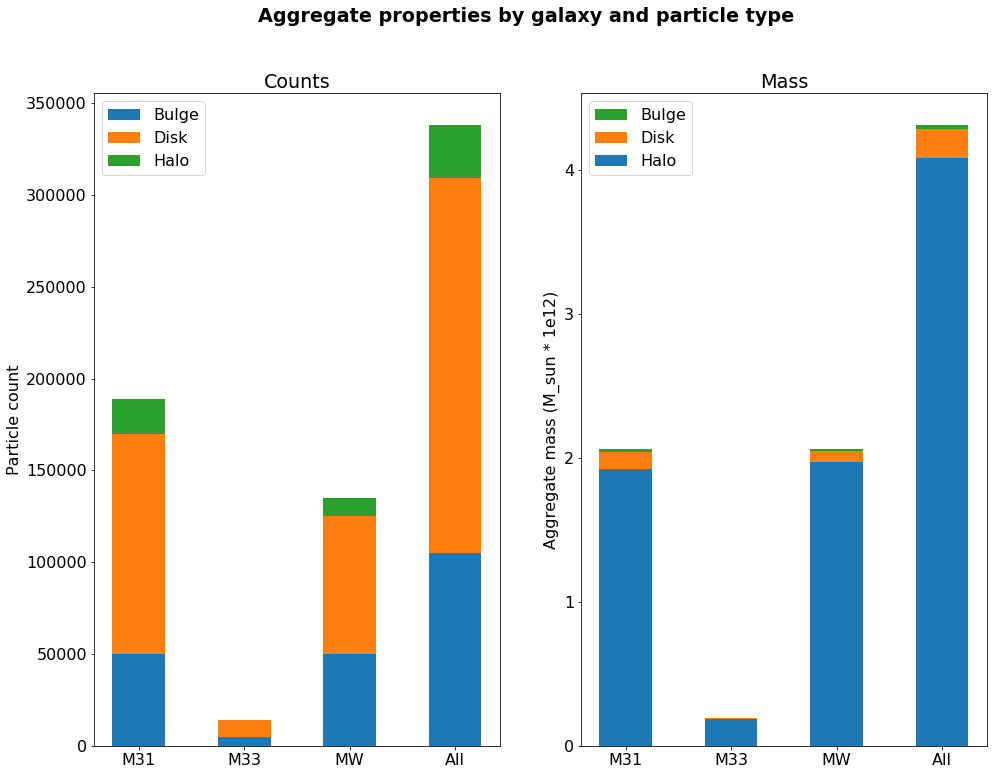

In [52]:
plt.rcParams.update({'font.size': 16})
N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

# Get the data into more convenient variables
chalo = counts['1 Halo'].values
cdisk = counts['2 Disk'].values
cbulge = counts['3 Bulge'].values
mhalo = df2['Halo Mass'].values
mdisk = df2['Disk Mass'].values
mbulge = df2['Bulge Mass'].values
names = df2['Galaxy Name'].values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,12))
fig.suptitle('Aggregate properties by galaxy and particle type', weight='semibold')

ax1.bar(ind, chalo, width)
ax1.bar(ind, cdisk, width, bottom=chalo)
ax1.bar(ind, cbulge, width, bottom=chalo+cdisk)

ax1.set_ylabel('Particle count')
ax1.set_xticks(ind)
ax1.set_xticklabels(names)
ax1.set_title('Counts')

ax2.set_ylabel('Aggregate mass (M_sun * 1e12)')
ax2.set_xticks(ind)
ax2.set_xticklabels(names)
ax2.set_title('Mass')

p1 = ax2.bar(ind, mhalo, width)
p2 = ax2.bar(ind, mdisk, width, bottom=mhalo)
p3 = ax2.bar(ind, mbulge, width, bottom=mhalo+mdisk)

ax2.set_ylabel('Aggregate mass (M_sun * 1e12)')
ax2.set_xticks(ind)
ax2.set_xticklabels(names)
ax2.set_title('Mass')
ax1.legend((p1[0], p2[0], p3[0]), ('Bulge', 'Disk', 'Halo'))
ax2.legend((p3[0], p2[0], p1[0]), ('Bulge', 'Disk', 'Halo'));

In [49]:
g.get_pivot('mean')

typename,1 Halo,2 Disk,3 Bulge,All
name,,,,
M31,38417600,1000000,1002630,"10,899,100.370"
M33,37322600,1000000,0,"13,700,209.790"
MW,39498500,1000000,1000500,"15,258,740.741"
All,38880171,1000000,1001895,"12,757,236.092"
